In [2]:
import pandas as pd
import numpy as np
import datetime 
import re
from urlextract import URLExtract
import spacy
import time
import pickle
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
extractor = URLExtract()
# remove all urls from posts
def replace_urls(x):
    urls = extractor.find_urls(x)
    if urls:
        x_new = replace_urls(x.replace(urls[0],''))
        return x_new
    else:
        return x

In [62]:
# df_full = pd.read_csv('data/sample_depression_large.csv', low_memory=False)
# df_full = pd.read_csv('data/mentalhealth01-18_08-19.csv', low_memory=False)
# df_full = pd.read_csv('data/depression_wrd_vec_lrg.csv', low_memory=False)
# df_full = pd.read_csv('data/suicidewatch.csv', low_memory=False)
df_full = pd.read_csv('data/anxiety_full2.csv', low_memory=False)
# df_full = pd.read_csv('data/depression_full2.csv', low_memory=False)



In [63]:
df_full.shape

df_full.selftext.value_counts().to_frame().head(50)

,selftext
"As I'm sure many of you already know first-hand it can be overwhelming even to do the ""little"" or ""normal"" things in life for those with anxiety issues. It's about time every one of us bragged about our triumphs big and small in our day to day life.\n\nThis weekly post is all about sharing our victories - large and small. Because let's face it - for those of us suffering with anxiety issue it really is all about the little things. Success &amp; victories large AND small happen all the time and these are worth sharing. Also, sometimes in sharing these moments of success, there is the added bonus of fellow Redditors - giving encouragement and hope. It helps to know that there are people actually beating this.\n",37
"As I'm sure many of you already know first-hand it can be overwhelming even to do the ""little"" or ""normal"" things in life for those with anxiety issues. It's about time every one of us bragged about our triumphs big and small in our day to day life.\n\nThis weekly post is all about sharing our victories - large and small. Because let's face it - for those of us suffering with anxiety issue it really is all about the little things. Success &amp; victories large AND small happen all the time and these are worth sharing. Also, sometimes in sharing these moments of success, there is the added bonus of fellow Redditors - giving encouragement and hope. It helps to know that there are people actually beating this. \n\n---\n\n**Come chat with us!** | Now with [OrangeChat Option]((https://app.orangechat.io/r/anxiety)** \nThat's right we have an /r/Anxiety irc channel were we hang out and talk about random things, or help those who are having a hard time. Tons of great people so feel free to stop on in and say hello! [Chatroom Weblink](https://kiwiirc.com/client/irc.snoonet.org/anxiety) : [More Information](http://www.reddit.com/r/Anxiety/wiki/irc)\n\n*********\n\n[Wiki](https://www.reddit.com/r/Anxiety/wiki/index) | [FAQ](http://www.reddit.com/r/Anxiety/wiki/faq) | [Types of Anxiety](https://www.reddit.com/r/Anxiety/wiki/anxiety_subtypes) | [Online Resources &amp; Downloads](http://www.reddit.com/r/Anxiety/wiki/onlineresources) | [IRC Channel](http://www.reddit.com/r/Anxiety/wiki/irc) | [Community Map](https://redd.it/5ff4bn)\n",36
"Greetings &amp; Salutations!\n\nUse this post to introduce yourself if you're new. Or maybe you're not so new, but haven't gotten around to introducing yourself yet in one of these posts. That's ok too! Either way, we'd love to offer you a warm welcome to our community. In fact, if you've introduced yourself before, why not take some time to say hi to the new people commenting here? What do you have going on this week that's giving you anxiety? Talk to us, we can do this together - **you're not alone in this**.\n\n--- \n\n###Question of the week:\n---\n\nWhat is something you keep meaning to do, but it just never quite happens? - For me it's ice skating. I'm crossing my fingers this year is the year! \n\n--- \n---\n\n\n**Come chat with us!** That's right we have an /r/Anxiety irc channel were we hang out and talk about random things, or help those who are having a hard time. Tons of great people so feel free to stop on in and say hello! [Chatroom Weblink](https://kiwiirc.com/client/irc.snoonet.org/anxiety) : [More Information](http://www.reddit.com/r/Anxiety/wiki/irc)\n\n*********\n\n[Wiki](https://www.reddit.com/r/Anxiety/wiki/index) | [FAQ](http://www.reddit.com/r/Anxiety/wiki/faq) | [Types of Anxiety](https://www.reddit.com/r/Anxiety/wiki/anxiety_subtypes) | [Online Resources &amp; Downloads](http://www.reddit.com/r/Anxiety/wiki/onlineresources) | [Anxiety Chatroom](https://app.orangechat.io/r/anxiety) | [Anxiety Sub Community Map](https://redd.it/5ff4bn)\n",36
.,34
What have you accomplished this week? Share your wins here!,33
"""Happy Sunday! What does your week look like?\n\nBoth anxiety related and off-topic discussion is allowed. Rules regarding potential triggers still 

In [64]:
# df_full = df_orig[(df_orig['selftext'] != '[deleted]') & (df_orig['selftext'] != '[removed]')].copy()

df_full.drop_duplicates(subset=['selftext'], inplace=True)
df_full.drop_duplicates(subset=['id'], inplace=True)

In [65]:
df_full['date'] = df_full.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))

In [66]:
# df_full.groupby('selftext').unique()
df_full.selftext.value_counts().to_frame().head(50)

,selftext
"My whole experience with anxiety and depression have just been so very very strange for me. This time 2 years ago I never would have said I had anxiety or depression, but at the end of this passed summer I had begun having panic attacks. Fast forward a few months to right before winter break my anxiety had become so bad I was barely functioning. I couldn't sleep, I was dropping weight, my nights were one long panic attack, I constantly couldn't breath, I wanted to die.\n\nOver winter break I started on escitalopram and it has been a very bumpy road. I was fine over the rest of break, but I still couldn't sleep. Right before I went back to college I went up in dosage, and started taking benadryl at night to sleep. I went down in dosage because it made me feel unfocused and uncoordinated. I continued to have freak out at nights until the benadryl knocked me out. I started to have dizzy spells but discovered it's because I was tensing my jaw and shoulders and my neck was stiff. Now most of the dizzy spells are gone, as well as a lot of the panic. I started to realize that anxiety had been ruling my life for years, it was just a loud mouth, false bravado, the cushion of a small home town, and an intense fear of being weak that kept me from noticing it.\n\nThe new thing that's popping up is having spells of feeling scared, sad, and alone. Every time I talk to people I keep thinking I'm too loud, I'm not funny, I talk too much, I cut people off. I immediately regret everything I did in the conversation. I'm afraid everyone actually think I'm just annoying, a loud mouth. They aren't as invested in me as I am in them, they just put up with me cause I'm there, or they just don't care about me as much as I care about them. Which of course is going to happen because I get way too invested in just a few close friends and I'm not going to be everyone's best friend, but I don't feel like I'm anyone's best friend. I'm scared I talk about my anxiety too much, I'm afraid I hide my anxiety too much. I'm afraid of not smiling and being happy, but I feel like exploding because I have other emotions than happiness damnit and I can't even express them to myself in private! \n\nThis sucks, it's just one thing after another, as soon as one gets better the next one starts. Sometimes I just feel so scared and alone.",1
Anyone here take this for anxiety? Just was prescribed 10mg 3x a day. Just took my first dose and I’m feeling a bit tired. Any experiences?,1
"-\t28/M/USA\n\nMy entire life I’ve always had a bit of OCD/Hypochondria, but I’ve never had major physical reactions. Just small little ticks, fixating thoughts, and unnecessary worries...but like I said, I’ve never had any major breakdowns/etc. Any anxiety I’ve had normally last for 10-15 seconds then goes away. \n\nI had a few health scares this year but after further follow ups, I’m completely okay. But, those stressors really triggered some anxiety and fixating thoughts over the last month on unnecessary health problems.\n\nOn Saturday (12/16) I popped my neck sideways and immediately got light headed afterwards. We were on our way to a Christmas party and throughout the entire party I felt random tingling in my head, I kept leaving the party and walking around outside (which made me feel better). My heart was racing, head felt tingly, and my fingers felt numb. **After feeling like I was going to pass out and die** (on and off for 3 hours) my wife drove me to the ER.\n\nAfter thorough testing at the hospital, it was ruled as an anxiety attack. For example, here are all the tests I’ve had this year to confirm my “healthy” status. \n\n-\tEKG (ER - 12/17 - Clear)\n-\tEchocardiogram (Dr - 11/17 - Clear)\n-\tTilt Table Test (Dr - 11/17 - Clear)\n-\tCBC (ER - 12/17 - Clear)\n-\tCMP (ER - 12/17 - Clear)\n-\tCT Scan of Neck (Dr - 11/17 - Clear)\n-\tCT Scan of Abdomen/Pelvis (Dr - 11/17 - Clear)\n-\tMRI of Head (Dr - 5/17 - Clear)\n-\tDoppler Ultrasound of Neck (ER - 12/17 - Clear)\n\nThe ER

In [67]:
# df_full[df_full.selftext.str.contains('I hate seeing my dad’s face')]
# df_full.selftext.dropna(inplace=True)

In [68]:
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("&amp;#x200B;",' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("&amp;nbsp;",' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("&amp;",' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub("nbsp;",' ',str(x)))


df_full['selftext'] = df_full.selftext.map(lambda x: re.sub('\n',' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: re.sub('  ',' ',str(x)))
df_full['selftext'] = df_full.selftext.map(lambda x: replace_urls(x))
# df_full['date'] = df_full.created_utc.apply(lambda x: pd.to_datetime(time.ctime(x)))

In [69]:
df_full['text_title'] = df_full.title + ' ' + df_full.selftext
df_full['text_title'] = df_full['text_title'].apply(lambda x: str(x))
df_full['text_title'] = df_full['text_title'].apply(lambda x: x.lower())

In [70]:
# df_non_null = df_full[(df_full.selftext != '[removed]')&(df_full.selftext != '[deleted]') & (df_full.selftext != 'nan')].copy()

In [71]:
df_full.text_title.value_counts().sort_values(ascending=False)
df_full.drop_duplicates(subset=['text_title'], inplace=True)

In [72]:
testing = df_full.text_title.value_counts().to_frame()
testing.head(5)

,text_title
"i'm fed up with who i am and my day to day struggles this is all so exhausting. i can't have a normal day like a normal person. i can't eat, i can't sleep, i can't stop thinking stressful thoughts, i can't just focus on something unrelated to my worries, i can't talk to me people normally, i can't trust, and i can't even be a good friend. i hate that things as simple as telling myself ""it's okay"" have to take strategies and techniques because i'm so internally fucked up that i need them. i just want to be there person that was loved and cared for but i don't even know who he is anymore. instead i am filled with made up anxieties and real anxieties that i can't control or impact and my attempts to control and impact them only make my life worse. i just want to be happy again but i'm not able to be. my eyes used to be filled with so much good but now they're just sad and empty. i want to be normal again. i want to matter to people. i want to be someone who you can't live without. instead i'm just some bum that annoys people and spends entire days freaking out. i don't want to live like this anymore...",1
"i have an exam in 8 hours and i have to sit in the same class as a guy who tried to sexually assault me. february 2nd, i had a panic attack 7th period immediatly after lunch and this ""friend"" skipped class with me to calm myself down, then he tried to force me to suck his dick and pulled a knife on me. i go to an all guys school btw. and tomorrow... well today i have to sit in an exam room for an exam i am not ready for at all for a subject i can not focus on because of him being in my class and the school not doing anything about it. i have to sit down, feet away from this guy who attempted to sexually assault me, and have panic attack mounting on panic attack because of him. i can't do it. i just can't do it. i haven't been able to eat the past few days and i really need to throw up just writing this and i have nothing in my system. i'm terrified.",1
"vertigo/dizziness during and after the gym i started at the gym in january, and aimed to go 3 times a week since i started. i've been meeting this mostly bar a couple of busy weeks and weekends i was away from home. i did join about a year ago but packed it up after about two weeks as i was going through a nasty benzo withdrawal at the time and couldn't spend much time outside.. but overall i'm doing a lot better this time and feel more motivated to do well. the last couple times i've been to the gym i've been getting incredibly dizzy, my mind becomes pretty foggy and i experience blurred vision and derealisation. this usually happens during my warmup, which makes the entire session pretty uncomfortable.. it's currently having a bit of an opposite effect to what i wanted to achieve by going originally.. i'm not sure if it's possibly related to my breathing or just a reaction to the increased heart rate and body temperature? i work in an office and i've been experiencing a lot of vertigo sensations while sitting at my desk, i'll try and sit back and sit up straight but the world around me feels as if it's falling.. and now during my workout as well. alongside that the muscle aches i'm having, particularly in my chest are making me a little anxious at work as well. maybe i'm pushing myself too much at the start? i usually start by doing 10 minutes on the cross trainer then cycle 5k and feel very unbalanced by the time i get on the exercise bike. has anyone else experienced anything similar to this, and has any tips/tricks to help me get through my workout?",1
"can anxiety affect sleep? hi, i've been having issues with sleeping for more than 4 hours continuously for about 3 years now. i wake up and my heart is pounding and i feel a bit of a knot in my stomach. could this be related to my anxiety? if so, does anyone have experience on how to deal with this? i've been considering seeing a therapist but i would like to be sure that this sleep issue can be explained by

<AxesSubplot:xlabel='date,date'>

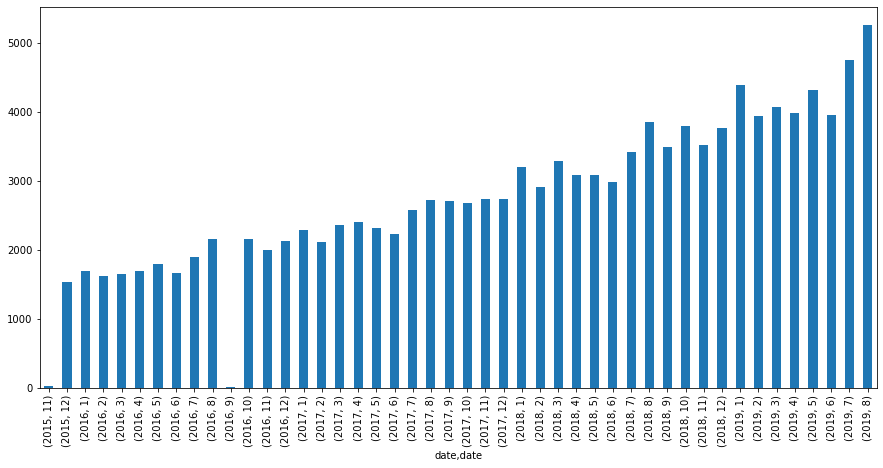

In [73]:
plt.figure(figsize=[15,7])
df_full.groupby([df_full["date"].dt.year, df_full["date"].dt.month]).size().plot(kind="bar")

In [74]:
nlp = spacy.load("en")

In [75]:
df_full

,created_utc,subreddit,author,domain,url,num_comments,score,ups,downs,title,...,is_self,from_id,permalink,name,author_flair_text,quarantine,link_flair_text,distinguished,date,text_title
0,1451002020,Anxiety,spwf,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3y4s...,2,4,4.0,0.0,"My empathy bites me in the ass, on a frequent ...",...,True,NaN,/r/Anxiety/comments/3y4suk/my_empathy_bites_me...,t3_3y4suk,NaN,False,NaN,NaN,2015-12-24 18:07:00,"my empathy bites me in the ass, on a frequent ..."
1,1451448026,Anxiety,steve472,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3yqo...,4,3,3.0,0.0,hey guys can you help me out? thanks,...,True,NaN,/r/Anxiety/comments/3yqouu/hey_guys_can_you_he...,t3_3yqouu,NaN,False,Needs A Hug/Support,NaN,2015-12-29 22:00:26,hey guys can you help me out? thanks hey guys ...
2,1451183146,Anxiety,cooperslink,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3ycq...,5,3,3.0,0.0,This is probably common...,...,True,NaN,/r/Anxiety/comments/3ycqjv/this_is_probably_co...,t3_3ycqjv,NaN,False,NaN,NaN,2015-12-26 20:25:46,this is probably common... i always feel like ...
3,1450836919,Anxiety,[deleted],self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xwu...,0,2,2.0,0.0,My Boyfriend Is Afraid of Disasters Every Day,...,True,NaN,/r/Anxiety/comments/3xwuuf/my_boyfriend_is_afr...,t3_3xwuuf,NaN,False,Relationships,NaN,2015-12-22 20:15:19,my boyfriend is afraid of disasters every day ...
4,1450657537,Anxiety,ArcadeInvasion,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xn1...,6,10,10.0,0.0,What do you do to help with your anxiety?,...,True,NaN,/r/Anxiety/comments/3xn1yo/what_do_you_do_to_h...,t3_3xn1yo,NaN,False,Needs A Hug/Support,NaN,2015-12-20 18:25:37,what do you do to help with your anxiety? just...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140105,1496271608,Anxiety,kcapc213,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6eio...,2,1,NaN,NaN,Do I have an anxiety disorder?,...,True,NaN,/r/Anxiety/comments/6eiorq/do_i_have_an_anxiet...,NaN,NaN,False,NaN,NaN,2017-05-31 18:00:08,"do i have an anxiety disorder? recently, i've ..."
140106,1493734262,Anxiety,mackstrat,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/68tc...,0,1,NaN,NaN,"A little bit of my life, parental issues, and ...",...,True,NaN,/r/Anxiety/comments/68tcf9/a_little_bit_of_my_...,NaN,NaN,False,NaN,NaN,2017-05-02 09:11:02,"a little bit of my life, parental issues, and ..."
140107,1494717413,Anxiety,Sportgirl234,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6b0u...,10,97,NaN,NaN,Panic attack at the gym,...,True,NaN,/r/Anxiety/comments/6b0ubj/panic_attack_at_the...,NaN,NaN,False,NaN,NaN,2017-05-13 18:16:53,panic attack at the gym today my husband and i...
140111,1494131908,Anxiety,Whit3boy316,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/69pk...,1,4,NaN,NaN,6 year old with anxiety when sick - help,...,True,NaN,/r/Anxiety/comments/69pkrb/6_year_old_with_anx...,NaN,NaN,False,Needs A Hug/Support,NaN,2017-05-06 23:38:28,6 year old with anxiety when sick - help hello...


In [76]:
361711/3

120570.33333333333

In [77]:
df_clean = df_full.reset_index().drop(columns=['index'])
df_clean
# topic_sample = df_clean.sample(120570, random_state=1)
# topic_sample

,created_utc,subreddit,author,domain,url,num_comments,score,ups,downs,title,...,is_self,from_id,permalink,name,author_flair_text,quarantine,link_flair_text,distinguished,date,text_title
0,1451002020,Anxiety,spwf,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3y4s...,2,4,4.0,0.0,"My empathy bites me in the ass, on a frequent ...",...,True,NaN,/r/Anxiety/comments/3y4suk/my_empathy_bites_me...,t3_3y4suk,NaN,False,NaN,NaN,2015-12-24 18:07:00,"my empathy bites me in the ass, on a frequent ..."
1,1451448026,Anxiety,steve472,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3yqo...,4,3,3.0,0.0,hey guys can you help me out? thanks,...,True,NaN,/r/Anxiety/comments/3yqouu/hey_guys_can_you_he...,t3_3yqouu,NaN,False,Needs A Hug/Support,NaN,2015-12-29 22:00:26,hey guys can you help me out? thanks hey guys ...
2,1451183146,Anxiety,cooperslink,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3ycq...,5,3,3.0,0.0,This is probably common...,...,True,NaN,/r/Anxiety/comments/3ycqjv/this_is_probably_co...,t3_3ycqjv,NaN,False,NaN,NaN,2015-12-26 20:25:46,this is probably common... i always feel like ...
3,1450836919,Anxiety,[deleted],self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xwu...,0,2,2.0,0.0,My Boyfriend Is Afraid of Disasters Every Day,...,True,NaN,/r/Anxiety/comments/3xwuuf/my_boyfriend_is_afr...,t3_3xwuuf,NaN,False,Relationships,NaN,2015-12-22 20:15:19,my boyfriend is afraid of disasters every day ...
4,1450657537,Anxiety,ArcadeInvasion,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/3xn1...,6,10,10.0,0.0,What do you do to help with your anxiety?,...,True,NaN,/r/Anxiety/comments/3xn1yo/what_do_you_do_to_h...,t3_3xn1yo,NaN,False,Needs A Hug/Support,NaN,2015-12-20 18:25:37,what do you do to help with your anxiety? just...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126771,1496271608,Anxiety,kcapc213,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6eio...,2,1,NaN,NaN,Do I have an anxiety disorder?,...,True,NaN,/r/Anxiety/comments/6eiorq/do_i_have_an_anxiet...,NaN,NaN,False,NaN,NaN,2017-05-31 18:00:08,"do i have an anxiety disorder? recently, i've ..."
126772,1493734262,Anxiety,mackstrat,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/68tc...,0,1,NaN,NaN,"A little bit of my life, parental issues, and ...",...,True,NaN,/r/Anxiety/comments/68tcf9/a_little_bit_of_my_...,NaN,NaN,False,NaN,NaN,2017-05-02 09:11:02,"a little bit of my life, parental issues, and ..."
126773,1494717413,Anxiety,Sportgirl234,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/6b0u...,10,97,NaN,NaN,Panic attack at the gym,...,True,NaN,/r/Anxiety/comments/6b0ubj/panic_attack_at_the...,NaN,NaN,False,NaN,NaN,2017-05-13 18:16:53,panic attack at the gym today my husband and i...
126774,1494131908,Anxiety,Whit3boy316,self.Anxiety,https://www.reddit.com/r/Anxiety/comments/69pk...,1,4,NaN,NaN,6 year old with anxiety when sick - help,...,True,NaN,/r/Anxiety/comments/69pkrb/6_year_old_with_anx...,NaN,NaN,False,Needs A Hug/Support,NaN,2017-05-06 23:38:28,6 year old with anxiety when sick - help hello...


In [78]:
# df_clean.to_csv('data/depression_temp_clean.csv')

In [79]:
from spacy.lang.en.stop_words import STOP_WORDS

def process_text(nlp, text, pos_list, lemma=False):

    text_full = [] 
    for doc in nlp.pipe(text, disable=['parser', 'ner', 'tagger']):
        # if part of speech list isnt empty return matches for pos
        if pos_list:
            tokens = [(ent.pos_) for ent in doc if not ent.is_stop and not ent.is_punct and ent.pos_ in pos_list]
            cleaned_text = " ".join(tokens)
            text_full.append(cleaned_text)
        elif lemma == True:
            tokens = [(ent.lemma_) for ent in doc if not ent.is_stop and not ent.is_punct]
            cleaned_text = " ".join(tokens)
            text_full.append(cleaned_text)
        else:
            tokens = [(ent.text) for ent in doc if not ent.is_stop and not ent.is_punct]
            cleaned_text = " ".join(tokens)
            text_full.append(cleaned_text)
            
    return text_full

corp = df_clean.text_title
a = process_text(nlp, corp, pos_list=[], lemma=False)
len(a)

126776

In [80]:
corp[0]

"my empathy bites me in the ass, on a frequent basis. anyone else feel like this? i try to be there for *everyone* and then i just carry on other people's stresses, which heightens my anxiety.  issues with my family, the holidays, world events, my friends, my job, etc. it just becomes this giant blizzard of anxiety through which i have no other choice but to slowly march and hope i don't fall.  i'm losing my appetite, i'm grinding my teeth at night which gives me jaw tension, my body refuses to get out of bed and face the horrors, my attention span and mindfulness dwindle. it's a mess. "

In [81]:
# import gensim
# documents = df_clean.text_title
# tokens = [' ' .join(gensim.utils.simple_preprocess(d)) for d in documents]
# tokens

In [82]:
a[0]

'empathy bites ass frequent basis feel like try carry people stresses heightens anxiety   issues family holidays world events friends job etc giant blizzard anxiety choice slowly march hope fall   losing appetite grinding teeth night gives jaw tension body refuses bed face horrors attention span mindfulness dwindle mess'

In [83]:
anxiety_stop = ['feel',
 'want',
 'myself',
 'people', 'feelings', 'feeling', 'not', 'fuck',
 'fucking','fucks', 'day', 'days', 'love', 'hate', 'try', 'talk', 'know', 'life','today', 'time', 'know'
'life', 'things', 'time', 'think', 'want', 'thoughts', 'wanna', 'felt', 'kinda', 'let'
'going', 'way', 'bad', 'good', 'years', 'got', 
'thought', 'thing', 'lot', 'right', 'better', 'thinking', 'mind',
'getting', 'away', 'stop', 'trying', 'long', 'said', 'started',
'person', 'hard', 'past', 'head', 'makes', 'little', 'having',
'point', 'sure', 'told', 'ago', 'weeks', 'months', 'stuff', 'find', 'times', 'able', 'maybe', 'bit', 'etc',
'happened', 'went', 'tomorrow', 'taking', 'hour', 'fine',
'guys', 'start', 'idk', 'going', 'new', 'making', 'lot', 'minutes', 'happen', 'week', 'pass', 'year', 'gon', 'need',
'tips', 'happen', 'happens', 'gets', 'usually'] + ['helps', 'help', 'helped', 'nervous', 'great', 'place', 'tell', 'advice']

In [41]:
depression_stop = ['feel',
'want',
'myself',
'people', 'feelings', 'feeling', 'not', 'fuck',
'fucking','fucks', 'day', 'days', 'love', 'hate', 'try', 'talk', 'know', 'life',
'fuck', 'mental', 'shit', 'thing', 'things', 'wanna', 'way', 'think', 'anymore', 'having', 'group',
'happy', 'today', 'time','thanks','etc','better','year','years','lot','kinda', 'felt','going',
'wish', 'good','bad','person', 'die','told', 'care', 'cares', 'got', 'okay', 'end', 'need', 'help',
'aaa', 'aaaaaand', 'aaaaand', 'aaaand', 'aaand', 'aand', 'aas',
'let','happen', 'happened', 'happens', 'think','word','kinda','say', 'month','months','help', 'guy', 'ago', 'met', 'living',
'aaa', 'aaaaaand', 'aaaaand', 'aaaand', 'aaand', 'aand', 'aas', 'hard', 'long', 'said',
'have', 'live', 'lose', 'start', 'sure', 'able', 'maybe', 'find', 'times', 'new', 'make', 'get', 'getting', 'gets'
'feels', 'advice', 'makes', 'tell', 'telling', 'tells', 'away', 'idk', 'actually', 'thought', 'thoughts', 'taking'
'stopped', 'stop', 'say', 'saying', 'says', 'come', 'great', 'weeks', 'week', 'right', 'tomorrow', 'lately',
'work', 'tried', 'everyday', 'birthday', 'like',
'motivation']
#  'depression'
#  'fucking',
#  'mental',
#  'hate',
#  'health',
#  'life',
#  'need',
#  'anxiety',
#  'talk',
#  'anymore',
#  'die',
# #  'friends',
#  'fuck',
#  'feeling',
#  'time',
#  'shit',
# #  'tired',
#  'happy',
#  'better',
#  'things',
#  'going',
#  'bad',
#  'way',
#  'care',
#  'good',
#  'wish',
#  'person',
#  'sad',
#  'day',
#  'makes',
#  'years',
#  'right',
#  'tell',
#  'self',
#  'love',
#  'worse',
#  'try',
#  'thoughts',
#  'live',
#  'stop',
#  'feel',
#  'help',
#  'nan',
#  'people',
#  'fucking',
#  'hate',
#  'myself',
#  'mental',
#  'health',
#  'depressed',
#  'fuck',
#  'shit',
#  'self',
#  'person',
#  'makes',
#  'better',
#  'wanna',
#  'sad',
#  'good',
#  'way',
#  'try',
#  'understand',
#  'wrong',
# #  'lonely',
#  'advice',
#   'lose',
#  'find',
#  'care',
#  'feelings',
#  'idk',
#  'emotions',
#  'bad',
#  'issues',
#  'talking',
#  'stupid',
#  'actually',
#  'ask',
#  'like',
#  'right',
#  'thoughts',
#  'life',
#  'things','best', 'bit', 'lot', 'great', 'says', 'getting', 'come', 'thing', 'little', 'today', 'started', 'maybe', 'feels', 'feel', 'feeling',
# "told", 'tomorrow', 'everyday', 'future', 'reason', 'pay', 'got', 'said', 'everyday', 'tomorrow', 'week', 'old', 'start', 'anxious', 'able', 'tried',
#    'features']+ ['think', 'thinking', 'happen', 'look', 'not', 'have', 'will', 'ill', 'sorry', 'alot', 'point', 'cuz', 'kinda', 'tell', 'exist', 'wait',
# 'post', 'have'] + ['let','happen','think','word','kinda','say','matt']





In [84]:
vectorizer = TfidfVectorizer(
                             stop_words = anxiety_stop,
                             strip_accents='unicode',
                             min_df = 10,
                             ngram_range=(1, 1),
                             max_df = .5, 
                             token_pattern = r'\b[a-zA-Z]{3,}\b'
                             
)

# vectorizer = TfidfVectorizer(
#                              stop_words = depression_stop,
#                              strip_accents='unicode',
#                              min_df = 35,
# #                              ngram_range=(1, 1),
#                              ngram_range=(2, 2),

#                              max_df = .5, 
#                              token_pattern = r'\b[a-zA-Z]{3,}\b',
                             
# )

# vectorizer = TfidfVectorizer(
#                              stop_words = depression_stop,
#                              strip_accents='unicode',
#                              min_df = 21,
#                              ngram_range=(1, 1),
#                              max_df = .5, 
#                              token_pattern = r'\b[a-zA-Z]{3,}\b'
                             
# )

In [85]:
corpus = a
doc_term = vectorizer.fit_transform(corpus).toarray()

In [86]:
df.score.unique().shape

(822,)

In [87]:
df = pd.DataFrame(doc_term)
df.columns = vectorizer.get_feature_names()
# df.drop(columns=['tips'], inplace=True)
# df['depressed'].mean()
df

,aaaand,aaah,aback,abandon,abandoned,abandoning,abandonment,abate,abc,abd,...,zonked,zoo,zoom,zoomed,zooming,zopiclone,zumba,zyprexa,zyrtec,zzzquil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# 361698 rows × 20614 columns

In [46]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):

        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\nTopic: ", ix)
        print([round(topic[i], 4) for i in topic.argsort()[:-no_top_words - 1:-1]])

In [89]:
# anxiety_nmf = NMF(15, alpha=.15, l1_ratio=.5, random_state=0, max_iter=100, init='nndsvd')
nmf = NMF(15, alpha=.19, l1_ratio=.5, random_state=0, max_iter=200, init='nndsvd')
# nmf = NMF(12, alpha=.19, l1_ratio=.5, random_state=0, max_iter=10, init='nndsvd')

In [90]:
%%time
doc_topic = nmf.fit_transform(doc_term)

CPU times: user 21min 20s, sys: 28 s, total: 21min 48s
Wall time: 3min 20s


In [91]:
# svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
# svd.fit_transform(doc_term)
term_topic = nmf.components_

In [94]:

# with open('pickles/depression.pickle', 'wb') as file:
#     pickle.dump(doc_term, file, protocol=4)
#     pickle.dump(vectorizer.get_feature_names(), file, protocol=4)
#     pickle.dump(doc_topic, file, protocol=4)
#     pickle.dump(term_topic, file, protocol=4)
    
with open('pickles/anxiety.pickle', 'wb') as file:
    pickle.dump(doc_term, file, protocol=4)
    pickle.dump(vectorizer.get_feature_names(), file, protocol=4)
    pickle.dump(doc_topic, file, protocol=4)
    pickle.dump(term_topic, file, protocol=4)

In [92]:
display_topics(model=nmf, feature_names=vectorizer.get_feature_names(), no_top_words=100)


Topic  0
fear, relationship, depression, actually, worse, wrong, feels, self, deal, therapist, worry, post, mental, end, pretty, health, constantly, let, kind, happy, talking, issues, therapy, problem, brain, wanted, control, afraid, look, understand, anymore, looking, recently, come, normal, shit, probably, reason, best, problems, tried, completely, real, worried, sorry, guess, hope, care, situation, world, read, different, stress, moment, remember, weird, thanks, found, worst, believe, live, ask, seeing, saying, finally, okay, big, idea, phone, stupid, couple, thank, worrying, body, old, boyfriend, comes, reading, change, basically, experience, girlfriend, girl, mean, crazy, wish, fact, sense, guy, literally, family, issue, lately, constant, lost, face, small, dealing, telling, cause

Topic:  0
[1.6255, 1.5981, 1.581, 1.4405, 1.4324, 1.4142, 1.3426, 1.3029, 1.2964, 1.2936, 1.269, 1.2398, 1.2367, 1.2225, 1.222, 1.1964, 1.1903, 1.1883, 1.1826, 1.1727, 1.1724, 1.1712, 1.167, 1.1639, 1.

In [50]:
# display_topics(model=nmf, feature_names=vectorizer.get_feature_names(), no_top_words=100)

In [95]:
doc_topic2 = pd.DataFrame(doc_topic)
doc_topic2

anxiety_cols = ['general', 'panic', 'occupational',
                'sleep', 'medication', 'heart/chest',
                'anxious/super/reason', 'school', 'work',
                'friends', 'home/house', 'food/dietary',
                'fear/death', 'social', 'driving']

# depression_cols = ['general', 'depression/anxiety/diagnosed',
#                    'work/issues', 'tired/exhaused/complaints', 
#                    'social', 'depressed/unclear', 'school', 'sleep',
#                    'friend_drama', 'sad/emo', 'family', 'suicide',
#                    'therapy/medication', 'work/occupational']

depression_cols = ['general', 'depression/anxiety/diagnosed',
                   'tired/sick', 'friends/social', 
                   'school', 'depressed/suicidal/reason', 'sleep', 'job',
                   'friend/best/girl', 'sad', 'mom/dad', 'suicide', 'therapy/meds',
                   'pain/hurt', 'lonely']

# # cols.remove('general')
# doc_topic2.columns = anxiety_cols
doc_topic2.columns = anxiety_cols

# doc_topic2.drop(columns=['depression/anxiety/diagnosed'], inplace=True)
# depression_cols.remove('depression/anxiety/diagnosed')
# doc_topic2.drop(columns=['friend/best/girl'], inplace=True)
# depression_cols.remove('friend/best/girl')


# doc_topic2.drop(columns=['depression/anxiety/diagnosed'], inplace=True)
doc_topic2
# doc_topic2.drop(columns=['general'], inplace=True)
# doc_topic2

,general,panic,occupational,sleep,medication,heart/chest,anxious/super/reason,school,work,friends,home/house,food/dietary,fear/death,social,driving
0,0.003998,0.000000,0.005601,0.004138,0.000000,0.000067,0.000000,0.000000,0.000000,0.005430,0.000795,0.001002,0.000000,0.000000,0.000000
1,0.010633,0.000000,0.000000,0.001536,0.001419,0.000513,0.000073,0.014991,0.000000,0.000000,0.004842,0.000000,0.000000,0.000000,0.000000
2,0.003988,0.000000,0.000000,0.011145,0.000000,0.002546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001508,0.000000,0.000000
3,0.010800,0.001787,0.000000,0.000700,0.000000,0.000000,0.000000,0.000000,0.003105,0.000000,0.002241,0.000000,0.008466,0.006330,0.000000
4,0.002810,0.000000,0.000000,0.000000,0.014107,0.000000,0.000000,0.000000,0.000000,0.000466,0.003797,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126771,0.009755,0.000000,0.000000,0.000000,0.000000,0.000000,0.002975,0.000000,0.006221,0.000000,0.000000,0.002925,0.000000,0.006508,0.000000
126772,0.011923,0.000658,0.010799,0.000568,0.001195,0.000000,0.000000,0.002447,0.001188,0.000883,0.028261,0.002267,0.000000,0.000000,0.000000
126773,0.004129,0.008488,0.000000,0.000000,0.000000,0.004226,0.000000,0.000000,0.014328,0.000000,0.003794,0.000000,0.000000,0.000000,0.000000
126774,0.005387,0.000000,0.000000,0.000000,0.000055,0.000000,0.000000,0.000000,0.004055,0.000000,0.000623,0.031430,0.005135,0.000000,0.000000


In [101]:
df_temp = df_clean.reset_index().drop(columns=['index'])
doc_topic_full = df_temp.join(doc_topic2)
doc_topic_full.drop(columns=['general'],inplace=True)
doc_topic_full['max_topic'] = doc_topic_full[depression_cols[1::]].idxmax(axis=1)
doc_topic_full

# doc_topic_full.to_csv('data/depression_topics_15.csv')

In [187]:
# doc_topic_full.to_csv('data/depression_topics_test.csv')
doc_topic_full.sort_values(by=['depressed/suicidal/reason'], ascending=False)[['text_title'] + depression_cols[1::] + ['max_topic']].values[140]



array(["i can't tell if i'm depressed or if this is just my normal anyone else ever feel this way? ",
       0.0, 0.0, 0.0, 0.0, 0.03196003336416343, 0.0, 0.0, 0.0,
       0.0002622489527503556, 0.0, 0.0, 0.0004167824453956632, 0.0, 0.0,
       'depressed/suicidal/reason'], dtype=object)

In [189]:
doc_topic_full[doc_topic_full.max_topic == 'therapy/meds'][['text_title'] + depression_cols[1::] + ['max_topic']].values[1121]



array(["extreme anxiety i don't understand life. why am i here? what am i suppose to create from this life? what life am i suppose to create? i'm terrified of fucking up. i'm terrified of living. i still go on with life enough to be ok for most of the time but why do i have to live? why do i feel like wasting time? why do i think i'm smart when i don't think i'm smart at the same time? i think i'm smart because i know that i can fake life and live in society and just live like most people do. but i'm not smart because i question everything and second guess myself. there is no being still.  why. just why are we all here? a question no person can answer. ",
       0.0006677047590606749, 0.0, 0.0, 0.0003647219021456624, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0013275680012747118, 0.0, 0.0,
       'therapy/meds'], dtype=object)

<AxesSubplot:>

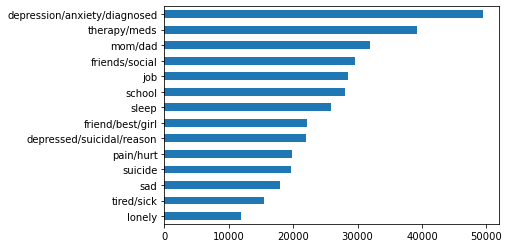

In [160]:
# doc_topic_full.groupby('max_topic').size().sort_values(ascending=True).plot.barh()
doc_topic_full.max_topic.value_counts().sort_values(ascending=True).plot.barh()

In [ ]:
doc_topic_full[['text_title']+ cols +['max_topic']].sort_values(by=['family'], ascending=False).values[500]


In [ ]:
doc_topic_full.max_topic.value_counts(normalize=True).sort_values().plot.barh()

In [ ]:
plt.figure(figsize=[15,9])

df_temp = doc_topic_full.groupby(doc_topic_full.date.dt.date)['max_topic'].value_counts().to_frame()
df_temp.columns = ['max topic count']
df_temp = df_temp.reset_index()
a = df_temp[df_temp['max_topic'] == 'home/house'].date
b = df_temp[df_temp['max_topic'] == 'home/house']['max topic count']
# plt.bar(a, b)

x = df_temp[df_temp.max_topic == 'social'].date 
y = df_temp[df_temp.max_topic == 'social']['max topic count'].rolling(10).sum()
x2 = df_temp[df_temp.max_topic == 'home/house'].date 
y2 = df_temp[df_temp.max_topic == 'home/house']['max topic count'].rolling(10).sum()
plt.plot(x,y, label='social')
plt.plot(x2,y2, label='school')
plt.legend()

In [ ]:
# doc_topic = pd.DataFrame(doc_topic)
# doc_topic['post'] = df_full.text_title
# doc_topic.values[2]

In [ ]:
# nmf.components_

In [ ]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

In [ ]:
# cnt_vectorizer = CountVectorizer(
#                              strip_accents='unicode',
#                              min_df = 11,
#                              ngram_range=(1, 1),
#                              max_df = .5, 
#                              token_pattern = r'\b[a-zA-Z]{3,}\b',
#                              stop_words = additional_stop_words
# )

# corpus = a
# doc_term2 = cnt_vectorizer.fit_transform(corpus).toarray()

In [ ]:
testing = df_full.text_title.reset_index().drop(columns=['index']).text_title.to_frame()
testing

In [ ]:
words = list(np.asarray(vectorizer.get_feature_names()))

In [ ]:
anch_words = [['school'],
              ['sleep'],
              ['friends', 'lonely'],
              ['kill', 'suicide'],
              ['work','job'],
              ['mom','dad'],
              ['motivation', 'loss']]



In [ ]:
list(anch_words)

In [ ]:
# p_y_given_x = np.random.random((58801, len(words)))
# p_y_given_x.shape

# for j, a in enumerate(anch_words):
#     p_y_given_x[:, j] = 0.5 * p_y_given_x[:, j] + 0.5 * X[:, a].mean(axis=1).A1

In [ ]:
import scipy.sparse as ss
doc_term2 = ss.csr_matrix(doc_term)

In [ ]:
anchored_topic_model = ct.Corex(n_hidden=9, seed=1, verbose=False)
anchored_topic_model.fit(doc_term2, words=words, anchors=anch_words, anchor_strength=2, docs=testing)




In [ ]:
topics = anchored_topic_model.get_topics(n_words=50)
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

In [ ]:
a = df_full.reset_index().drop(columns=['index']).copy()

In [ ]:
a

In [ ]:

import gensim

documents = a.text_title

# documents = topic_doc_df.sort_values(by=['dietary_related'], ascending=False).text_title.head(10000)
# documents = topic_doc_df[topic_doc_df.max_label == 'suicide'].text_title
tokenized_docs = [gensim.utils.simple_preprocess(d) for d in documents]
model = gensim.models.Word2Vec(tokenized_docs, size=500, window=5, min_count=5, sg=1)

In [ ]:
man_wom = model.wv['psychiatrist'] - model.wv['counselor']
model.wv.similar_by_vector(man_wom,topn=20)

In [ ]:
man_wom = model.wv['psychiatrist'] - model.wv['meds'] 
model.wv.similar_by_vector(man_wom,topn=20)
# gend = model.wv['gender']
# cos_sim=np.dot(man_wom,gend)/(np.linalg.norm(man_wom)*np.linalg.norm(gend))
# cos_sim

In [ ]:
man_wom = model.wv['sexual'] - model.wv['abuse'] 
model.wv.similar_by_vector(man_wom,topn=20)

In [ ]:
man_wom = model.wv['zelda'] + model.wv['anime'] 
model.wv.similar_by_vector(man_wom,topn=20)

In [ ]:
man_wom = model.wv['exhausted'] + model.wv['bored'] 
model.wv.similar_by_vector(man_wom,topn=20)